In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
file_1 = pd.read_excel("data_pttk_1_new.xlsx")
file_2 = pd.read_excel("data_pttk_2_new.xlsx")
file_3 = pd.read_csv("data_pttk_3_new.csv")

print(file_1.head())
print(file_2.head())
print(file_3.head())

  mã sv   0.1  0.1.1  Unnamed: 3  0.2  Unnamed: 5  điểm thi   Unnamed: 7
0    b1   9.0    7.0         NaN  6.0         NaN      6.00     sáu điểm
1    b2   9.0    7.0         NaN  6.0         NaN      6.00     sáu điểm
2    b3  10.0    9.0         NaN  7.0         NaN      7.25  bảy hai lăm
3    b4   9.0    7.0         NaN  6.0         NaN      6.00     sáu điểm
4    b5  10.0    8.0         NaN  7.0         NaN      7.50     bảy rưỡi
  mã sv   0.1  0.1.1  Unnamed: 3  0.2  Unnamed: 5  điểm thi Unnamed: 7
0    a1   9.0    7.0         NaN  6.0         NaN      6.00        NaN
1    a2   9.0    7.0         NaN  6.0         NaN      5.50        NaN
2    a3  10.0    8.0         NaN  7.0         NaN      6.75        NaN
3    a4  10.0    8.0         NaN  6.0         NaN      7.00        NaN
4    a5   9.0    7.0         NaN  6.0         NaN      6.00        NaN
   Họ Tên    10%   20%  20%.1   Thi
0  31_011  8.375  7.25    8.5   9.0
1  31_012  8.250  7.25    8.5   9.0
2  31_013  8.500  7.50    8.

In [145]:
# Đổi tên cột để chuẩn hóa
file_1.columns = ['Họ Tên', '10%', '20%', 'column3', '20%.1', 'column5', 'Thi', 'ghi_chu']
file_2.columns = ['Họ Tên', '10%', '20%', 'column3', '20%.1', 'column5', 'Thi', 'ghi_chu']
file_3.columns = ['Họ Tên', '10%', '20%', '20%.1', 'Thi']

# Chọn các cột cần thiết
file_1_selected = file_1[['Họ Tên', '10%', '20%', '20%.1', 'Thi']]
file_2_selected = file_2[['Họ Tên', '10%', '20%', '20%.1', 'Thi']]
file_3_selected = file_3[['Họ Tên', '10%', '20%', '20%.1', 'Thi']]

# Gộp dữ liệu
merged_data = pd.concat([file_1_selected, file_2_selected, file_3_selected], axis=0)

# Chuyển các cột cần điền giá trị trung bình thành kiểu số
numeric_columns = ['10%', '20%', '20%.1', 'Thi']
merged_data[numeric_columns] = merged_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Điền các giá trị thiếu bằng giá trị trung bình của từng cột và làm tròn 1 chữ số sau dấu phẩy
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].mean().round(1))

# Cập nhật giá trị cột 'Thi' thành 0 nếu tất cả ba cột đầu vào đều bằng 0
merged_data.loc[(merged_data[['10%', '20%', '20%.1']] == 0).all(axis=1), 'Thi'] = 0

# Đổi tên cột 'Họ Tên' theo thứ tự b1, b2, b3, ...
merged_data['Họ Tên'] = [f"b{i+1}" for i in range(len(merged_data))]

# Xuất dữ liệu ra file mới
merged_data.to_excel("data_pttk_new.xlsx", index=False)

print("Dữ liệu đã được làm sạch, gộp, đổi tên 'Họ Tên', và lưu vào file 'data_pttk_new.xlsx'.")

Dữ liệu đã được làm sạch, gộp, đổi tên 'Họ Tên', và lưu vào file 'data_pttk_new.xlsx'.


In [146]:
print(merged_data.head(10))

  Họ Tên   10%  20%  20%.1   Thi
0     b1   9.0  7.0    6.0  6.00
1     b2   9.0  7.0    6.0  6.00
2     b3  10.0  9.0    7.0  7.25
3     b4   9.0  7.0    6.0  6.00
4     b5  10.0  8.0    7.0  7.50
5     b6   9.0  7.0    6.5  6.50
6     b7   0.0  0.0    0.0  0.00
7     b8  10.0  8.0    6.0  7.25
8     b9  10.0  8.0    8.0  8.00
9    b10  10.0  8.0    7.5  8.75


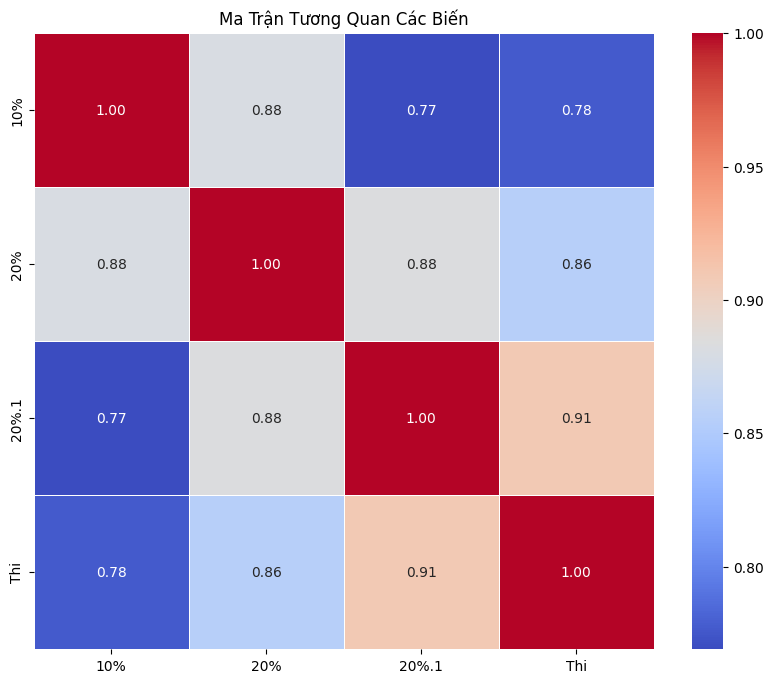

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ cột không phải số
merged_data_numeric = merged_data.select_dtypes(include=[np.number])

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
correlation_matrix = merged_data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Hiển thị biểu đồ
plt.title('Ma Trận Tương Quan Các Biến')
plt.show()


In [148]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Đọc dữ liệu đã làm sạch
merged_data = pd.read_excel("data_pttk_new.xlsx")

# Chọn cột đầu vào và mục tiêu
X = merged_data[['10%', '20%', '20%.1']]
y = merged_data['Thi']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Normalization dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lưu scaler vào đĩa
scaler_filename = 'scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))

# Huấn luyện mô hình KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Lưu mô hình vào đĩa
model_filename = 'knn_model.sav'
pickle.dump(knn, open(model_filename, 'wb'))

# Dự đoán và đánh giá mô hình
y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2%}")


MAE: 0.44
MSE: 0.42
MAPE: 6.91%


In [149]:
def predict_score(percent10, percent20, percent20_1):
    # Tải scaler và mô hình từ đĩa
    scaler = pickle.load(open('scaler.sav', 'rb'))
    loaded_model = pickle.load(open('knn_model.sav', 'rb'))
    
    # Dữ liệu đầu vào
    sample_data = np.array([[percent10, percent20, percent20_1]])
    
    # Normalization dữ liệu đầu vào
    sample_data_scaled = scaler.transform(sample_data)
    
    # Dự đoán
    prediction = loaded_model.predict(sample_data_scaled)
    
    # Dự đoán đã nằm trên thang điểm gốc
    prediction_score = round(prediction[0], 2)  # Trả về dự đoán đã được chuẩn hóa
    
    return prediction_score

# Test với dữ liệu mẫu
percent10 = 0.0
percent20 = 0.0
percent20_1 = 0.0

predicted_score = predict_score(percent10, percent20, percent20_1)
print(f"Predicted Score: {predicted_score}")


Predicted Score: 0.0


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
